<a href="https://colab.research.google.com/github/ArvinAz/Python/blob/main/FINALPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Proposal**

**Introduction**

Computers are a device that we use for our everyday and they have features that makes each one different. Some computers can run faster, while others can hold more data, or have a bigger screen etc.  The list goes on and the parts and there are so many factors that make the price of the computer. As a student majoring in computer science and programming, I wanted to look into this and answer the following:

**Research Questions**

What components determines the price and speed of the computer?
How did the price of the computers change overtime?
And the difference in regular and premium computers.
By answering these question, future computer builders will be aware of what parts of a computer is expensive and shoppers can know what computer to buy.

**Data to be used**

The dataset I will be using is on the website on Kaggle titled Basic Computer Data which has over 6000 rows of different computers. [Link to data]("https://www.kaggle.com/datasets/kingburrito666/basic-computer-data-set")

I will download the data, upload it into my GitHub, take the link of the raw data, and put in a csv variable and analyze the data in Google Colabatory (using Python).

**Approach**

Before analyzing the data, I will convert all the categorical data, cd, multi, and premium to 1 and 0 instead of yes or no. This way we can use these as a boolean to see if a computer has feature on not. 
it can also help us to count how many computers have a certain feature if we tried to get the sum of of all of the computers that have it. After that I will use a bar graph to show how the prices have changed as time passes and why they did. I will also be doing a scatter plot that will compare the hd and ram with the price and speed of their computer. Then I will make bar graphs of the categorical data to see if they affect the speed of the computer. Then I will do a linear regression for the computer price then a linear svc and confusion matrix for premium computers to see which premium computers are not premium. 



## **Project**

Before I start cleaning up my data and make graphs, I would like to define all of the columns from the data that I choose. Small problem though, the creator of the data set didn't define the columns so I had to go online and do some research.

**`Price`** - How much the computer costs or how much its worth.  This is a numeric data type and it depends on its traits and parts

**Speed** - This is measured in hertz. The speed of a computer determines the central processing unit(The element of a computer that carries out received programming) to retrieve, decode, carry out, and write back functions of codes.

**hd** - is an initialism used for **hard drive**. It basically is the storage of the computer. The units for the hard drives are in gigabytes.

**Ram** - stands for random access memory. It serves as a storage for any temporary data unlike hd where it stores eternal data. It is used to handle all active tasks and apps. Ram is also measured in gigabytes. There are only 6 sizes of ram: 2, 4, 8, 16, 24, 32

**Screen** - The screen size of the computer. It is measured in inches. There is only 3 sizes in this data set though: 14, 15, 17.

**cd** - Determines if a disk can be inserted in the computer.

**Multi** - Determines if a computer has multiple processors or cpus. Good for multitasking or under the demands of powerful apps and programs.

**Premium** - Determines if a machine is priced highly because of a specification offering the very latest components, sharpest screens and other components that make it stand out.

**Ads** - This is the number of ads that advertised the computer. But this seems like a useless variable because we are trying to determine what contributes to the speed and price of a computer, not how it is advertised.

**Trend** - A number that determines the time or year the computer was made, built, or given to the public or maybe the number represents how the computer were changed or revolutionized from the previous trend. But you get the idea, this serves as a way to access groups of computers from specific time. This will be important for this research.

`Now that we have identified all of the columns, lets clean the data for data visualization`

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


df = pd.read_csv('https://raw.githubusercontent.com/ArvinAz/Python/main/Computers.csv')

#Removing the unnamed column
df = df.drop(['Unnamed: 0','ads'],axis = 1)
df_og = df.copy()


#check the dimensions of the data
print('The dimensions of the data are: ', df.shape)

#show the beginning of the data
df.head()

The dimensions of the data are:  (6259, 9)


,price,speed,hd,ram,screen,cd,multi,premium,trend
0,1499,25,80,4,14,no,no,yes,1
1,1795,33,85,2,14,no,no,yes,1
2,1595,25,170,4,15,no,no,yes,1
3,1849,25,170,8,14,no,no,no,1
4,3295,33,340,16,14,no,no,yes,1


In [ ]:
df.info()
#check the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   trend    6259 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 440.2+ KB


In [ ]:
df.nunique()
#Check the unique values

price      808
speed        6
hd          59
ram          6
screen       3
cd           2
multi        2
premium      2
trend       35
dtype: int64

In [ ]:
#check if we have any empty data
df.isna().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
trend      0
dtype: int64

In [ ]:
from pandas.core import apply
#Copying the data in case we want to reset the data to the original.
df_og = df.copy()
#Making sure that the columns are all numeric data just to be safe
df.columns
df[[ 'price', 'speed', 'hd', 'ram', 'screen',  'trend']] = \
 df[[  'price', 'speed', 'hd', 'ram', 'screen', 'trend']].apply(pd.to_numeric)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   trend    6259 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 440.2+ KB


In [ ]:
errors = pd.DataFrame(df[pd.to_numeric(df.premium, errors='coerce').isnull()])
errors.head()
#checking any errors on the categorical data

,price,speed,hd,ram,screen,cd,multi,premium,trend
0,1499,25,80,4,14,no,no,yes,1
1,1795,33,85,2,14,no,no,yes,1
2,1595,25,170,4,15,no,no,yes,1
3,1849,25,170,8,14,no,no,no,1
4,3295,33,340,16,14,no,no,yes,1


In [ ]:
#Here we are replacing all of the yes and nos with 1s and 0s. 
#Cd
df.replace({'cd': {'yes': 1}}, regex=False,inplace=True)
df.replace({'cd': {'no': 0}}, regex=False,inplace=True)
#Premium
df.replace({'premium': {'yes': 1}}, regex=False,inplace=True)
df.replace({'premium': {'no': 0}}, regex=False,inplace=True)
#Multi
df.replace({'multi': {'yes': 1}}, regex=False,inplace=True)
df.replace({'multi': {'no': 0}}, regex=False,inplace=True)
#df.info()
df_og = df.copy()

In [ ]:
df.describe()
#The data is ready to be analyzed

,price,speed,hd,ram,screen,cd,multi,premium,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,35.000000


In [ ]:
    #ANOTHER reshaping aggregations
    mean = df.groupby('trend').agg({
    'price':[np.mean, np.std],
    'speed':[np.mean, np.std],
    'hd':[np.mean, np.std],
    'ram':[np.mean, np.std],
    'screen':[np.mean, np.std],
    'cd':[np.sum],
    'multi':[np.sum],
    'premium':[np.sum]


})
mean

price                  speed                      hd              \
              mean         std       mean        std         mean         std   
trend                                                                           
1      2499.117021  681.195105  43.595745  14.881120   213.468085   96.259696   
2      2424.515789  593.118370  44.263158  15.021411   230.778947   89.937352   
3      2414.930000  578.810924  45.350000  15.084526   223.960000   89.182926   
4      2378.962963  516.347306  45.537037  14.899932   216.277778   81.205386   
5      2401.172662  559.866870  44.726619  14.762764   270.417266  127.103969   
6      2364.011364  612.649692  45.045455  15.362968   271.551136  133.668193   
7      2325.935743  598.539469  44.016064  15.789688   277.807229  156.437233   
8      2340.845638  685.326718  43.583893  15.648969   308.389262  203.800761   
9      2336.504065  661.087464  43.821138  15.737662   292.121951  151.709905   
10     2284.961131  601.715646  43.766784  15.766988   316.091873  198.969148   
11     2339.467181  589.778077  43.725869  16.109790   324.617761  180.653628   
12     2242.214545  591.695184  42.120000  15.744660   329.410909  176.879321   
13     2281.569444  568.982351  44.851852  16.074718   314.375000  153.529493   
14     2209.154110  572.972349  44.859589  15.708824   322.664384  139.626294   
15     2156.265918  525.335525  44.940075  15.621828   319.029963  139.030609   
16     2200.410423  547.463522  55.605863  24.273854   337.736156  159.586042   
17     2211.489676  522.493427  58.200590  25.583276   357.191740  149.498734   
18     2291.355311  545.586262  55.824176  24.669846   469.465201  255.120833   
19     2304.017778  613.718300  58.302222  25.206774   485.555556  230.661273   
20     2184.431452  611.979945  55.322581  22.172510   502.806452  275.804019   
21     2171.634146  643.725270  49.121951  16.749298   505.521951  259.804481   
22     2205.197531  593.461002  49.512346  16.950142   563.333333  266.050735   
23     2058.041885  517.614283  51.628272  17.625133   555.926702  271.415422   
24     1994.527473  472.148617  50.972527  16.968099   553.923077  254.910286   
25     1985.367089  466.855716  52.822785  17.998414   556.126582  247.581544   
26     2080.565789  469.363366  69.671053  19.940234   583.164474  232.512634   
27     1977.822086  439.867459  71.926380  18.772701   605.239264  227.792000   
28     1931.507576  446.298611  71.500000  18.059909   622.371212  220.144935   
29     1988.372093  436.417340  73.116279  19.390972   623.930233  269.713714   
30     1963.760000  438.211131  71.066667  19.064140   840.453333  256.101400   
31     1937.461538  422.687687  79.769231  16.321062   811.576923  257.755649   
32     1946.078431  420.863343  80.039216  16.365770   820.333333  252.388404   
33     1968.875000  419.231115  81.350000  16.448131   881.800000  244.299438   
34     2377.948718  533.123761  81.743590  16.471216  1039.846154  378.440396   
35     2373.333333  534.401452  81.743590  16.471216  1039.846154  378.440396   

             ram               screen             cd multi premium  
            mean       std       mean       std  sum   sum     sum  
trend                                                               
1       6.255319  3.148429  14.372340  0.789502    7     0      90  
2       6.168421  3.123870  14.378947  0.787927    7     0      94  
3       6.940000  3.532876  14.420000  0.780831    7     0      99  
4       7.074074  4.068809  14.342593  0.750850    0     0     106  
5       7.294964  4.190142  14.489209  0.801872    6     0     137  
6       7.034091  4.205979  14.551136  0.833374   18     0     163  
7       7.028112  4.465280  14.381526  0.726112   56     9     236  
8       7.201342  4.541585  14.426174  0.830553   76    13     285  
9       7.211382  4.822993  14.410569  0.781241   56    10     213  
10      6.692580  4.566395  14.526502  0.847506   73    14     250  
11      6.911197  4.510521  14.552124

#Data and Challenges

---

So one of the challenges I faced when presenting my data was trying to find the right visuals to use. Because there was over 6000 rows of computer data, I couldn't possibly fit all of the data into one graph. So in order to combat this I had to look into other peoples code to get the right results. I will put in a source list at the conclusion.



#Prices over Time

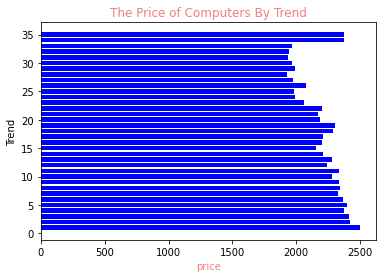

In [ ]:


#Here we will get a bar graph of how much money for each trend computer.
ramgroup = df.groupby('trend').mean()
ram = [ram for ram, df in df.groupby('trend')]  # to extract the unique values 'names'

plt.barh(ram, ramgroup['price'], color='blue') # barh is short for horizontal bar
plt.title('The Price of Computers By Trend', color='lightcoral')
plt.ylabel('Trend')
plt.xlabel('price', color='lightcoral')
plt.show()
#The reason why the prices was decreasing the computer was to make 

The reason why the prices was decreasing the computer because computer were given to the public and so the prices of computers drop to make them more affordable. But all of a sudden, there was a sudden change of prices between trend 33 and 34. Why is that? Well find out.

In [ ]:
df33 = df[df['trend'] == 33]
df34 = df[df['trend'] == 34]
df33.describe()

,price,speed,hd,ram,screen,cd,multi,premium,trend
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,1968.875000,81.350000,881.800000,11.800000,15.025000,0.700000,0.125000,0.975000,33.0
std,419.231115,16.448131,244.299438,6.954799,0.861945,0.464095,0.334932,0.158114,0.0
min,1295.000000,66.000000,420.000000,4.000000,14.000000,0.000000,0.000000,0.000000,33.0
25%,1619.250000,66.000000,769.500000,7.000000,15.000000,0.000000,0.000000,1.000000,33.0
50%,1946.500000,75.000000,925.000000,8.000000,15.000000,1.000000,0.000000,1.000000,33.0
75%,2263.000000,100.000000,1000.000000,16.000000,15.000000,1.000000,0.000000,1.000000,33.0
max,2790.000000,100.000000,1200.000000,24.000000,17.000000,1.000000,1.000000,1.000000,33.0


In [ ]:
df34.describe()

,price,speed,hd,ram,screen,cd,multi,premium,trend
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,2377.948718,81.743590,1039.846154,18.666667,15.051282,0.717949,0.128205,0.974359,34.0
std,533.123761,16.471216,378.440396,8.477007,0.856821,0.455881,0.338688,0.160128,0.0
min,1495.000000,66.000000,528.000000,8.000000,14.000000,0.000000,0.000000,0.000000,34.0
25%,1842.000000,66.000000,850.000000,8.000000,15.000000,0.000000,0.000000,1.000000,34.0
50%,2444.000000,75.000000,1200.000000,16.000000,15.000000,1.000000,0.000000,1.000000,34.0
75%,2787.500000,100.000000,1200.000000,24.000000,15.000000,1.000000,0.000000,1.000000,34.0
max,3290.000000,100.000000,1600.000000,32.000000,17.000000,1.000000,1.000000,1.000000,34.0


As you can see on the mean, the **hard drive and the ram mean** higher on trend 34 then on 33. To get a better understanding of this, going to put these into box plots

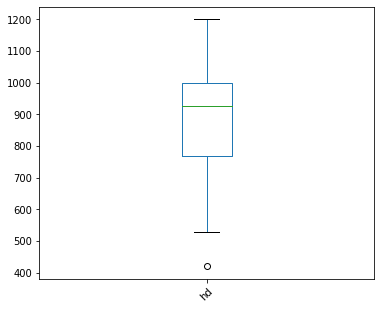

In [ ]:
#HD AND RAM
df33.boxplot(column='hd',grid=False, rot =45,figsize=(6,5))


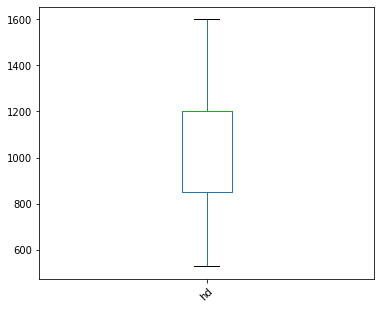

In [ ]:
df34.boxplot(column='hd',grid=False, rot =45,figsize=(6,5))

In [ ]:
#We can also compare the stats of the computers with the lowest and highest price. Here is another aggregation table
table = pd.pivot_table(data=df,index=['price'])
table

,cd,hd,multi,premium,ram,screen,speed,trend
price,,,,,,,,
949,0.0,125.00,0.0,1.0,2.0,14.0,33.0,14.0
999,0.0,133.75,0.0,1.0,2.0,14.0,33.0,13.0
1049,0.0,80.00,0.0,1.0,2.0,14.0,33.0,7.5
1088,0.0,250.00,0.0,1.0,2.0,15.0,33.0,20.0
1099,0.0,340.00,0.0,1.0,4.0,14.0,33.0,21.5
...,...,...,...,...,...,...,...,...
4594,1.0,1100.00,0.0,1.0,16.0,14.0,50.0,8.0
4694,1.0,1100.00,0.0,1.0,16.0,14.0,66.0,8.0
4799,1.0,1000.00,0.0,1.0,16.0,17.0,66.0,13.0


#Hard Drive and RAM
now the hard drive and the ram has caught my attention so now I want to see if they correlate with the price and the speed.


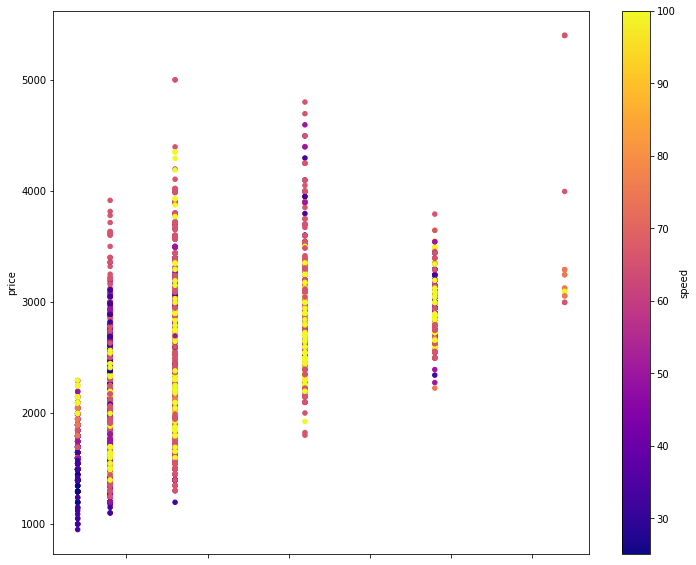

In [ ]:
df.plot.scatter(x = 'ram',y = 'price', c = 'speed', colormap='plasma' ,figsize=(12,10))

#Speed and Categorical Data

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7fb6d1c9e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py", line 177, in <lambda>
    ref = weakref.ref(self, lambda ref, sid=id(self),
KeyboardInterrupt


Text(0, 0.5, 'Multi')

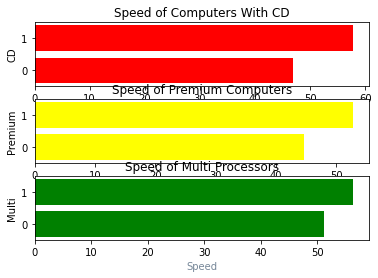

In [ ]:
#This 3 graph will show the price and speed of a computer that you can insert a disk in

plt.subplots(nrows=3, ncols=3)

cdgroup = df.groupby('cd').mean()
cd = [cd for cd, df in df.groupby('cd')]

plt.subplot(3, 1, 1)
plt.barh(cd, cdgroup['speed'], color='red')
plt.xlabel('Speed', color='lightslategray')
plt.title('Speed of Computers With CD')
plt.ylabel('CD')

premgroup = df.groupby('premium').mean()
prem = [premium for premium, df in df.groupby('premium')]

plt.subplot(3, 1, 2)
plt.barh(prem, premgroup['speed'], color='yellow')
plt.xlabel('Speed', color='lightslategray')
plt.title('Speed of Premium Computers')
plt.ylabel('Premium')

multigroup = df.groupby('multi').mean()
multi = [multi for multi, df in df.groupby('multi')]

plt.subplot(3, 1, 3)
plt.barh(multi, multigroup['speed'], color='green')
plt.xlabel('Speed', color='lightslategray')
plt.title('Speed of Multi Processors')
plt.ylabel('Multi')

In [ ]:
#Changing the the numeric data to objects
#df['cd'] = df['cd'].map({0: '0', 1: '1'})
df = df_og

#Premium Computers
now what if you wanted to how different a premium computer is to a regular

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


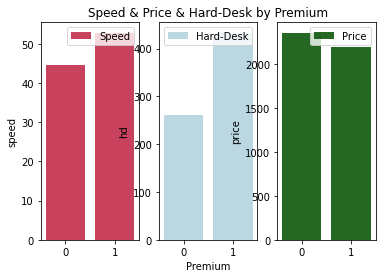

In [ ]:
pregroup = df.groupby('premium').mean()
pre = [premium for premium, df in df.groupby('premium')]
plt.subplots(nrows=1, ncols=3)


plt.subplot(1, 3, 1)
sns.barplot(pre, pregroup['speed'], label='Speed', color='crimson', alpha=0.9)
plt.legend()

plt.subplot(1, 3, 2)
sns.barplot(pre, pregroup['hd'], label='Hard-Desk', color='lightblue', alpha=0.9)
plt.legend()
plt.title('Speed & Price & Hard-Desk by Premium')
plt.xlabel('Premium')

plt.subplot(1, 3, 3)
sns.barplot(pre, pregroup['price'], label='Price', color='darkgreen', alpha=0.9)
plt.legend()
plt.show()

#Regression(The R square)
Now lets see how usable the data is by using a regression 

In [ ]:
from sklearn import preprocessing

#use the preprocessing MinMaxScaler to make the 
min_max_scaler = preprocessing.MinMaxScaler()

#fit_transform gives a numpy array
x_scaled = min_max_scaler.fit_transform(df)

#put it back into a data frame and reassign the column names
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['price',	'speed',	'hd',	'screen',	'ram','cd','multi','premium','trend']
df_scaled


,price,speed,hd,screen,ram,cd,multi,premium,trend
0,0.123596,0.000000,0.000000,0.066667,0.000000,0.0,0.0,1.0,0.0
1,0.190112,0.106667,0.002475,0.000000,0.000000,0.0,0.0,1.0,0.0
2,0.145169,0.000000,0.044554,0.066667,0.333333,0.0,0.0,1.0,0.0
3,0.202247,0.000000,0.044554,0.200000,0.000000,0.0,0.0,0.0,0.0
4,0.527191,0.106667,0.128713,0.466667,0.000000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
6254,0.166517,1.000000,0.221782,0.200000,0.333333,0.0,0.0,1.0,1.0
6255,0.286292,0.546667,0.381188,0.466667,0.333333,1.0,1.0,1.0,1.0
6256,0.383146,1.000000,0.554455,0.733333,0.333333,1.0,0.0,1.0,1.0
6257,0.280000,1.000000,0.381188,0.466667,0.333333,1.0,0.0,1.0,1.0


In [ ]:
from sklearn.linear_model import LinearRegression

#take out price, because that is what we are going to be studying
y = df_scaled['price'].copy()
X = df_scaled.drop(['price'], axis = 1)

lin_reg = LinearRegression().fit(X,y)
r_sq_Linear = lin_reg.score(X, y)

print("Linear model assessment: ", r_sq_Linear)


Linear model assessment:  0.7696750615406203


#Classifier for premium - LinearSVC and Confusion matrix

In [ ]:
num1 = 0
num2 = 0
num3 = 0

for index, row in df.iterrows():
  if row['premium'] == 1:
    num1 = num1 + 1
    if row['cd'] == 1:
      num2 = num2 + 1
      if row ['multi'] == 1:
        num3 = num3 + 1
        
print(num1)
print(num2)
print(num3)

5647
2824
868


Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'trend'],
      dtype='object')

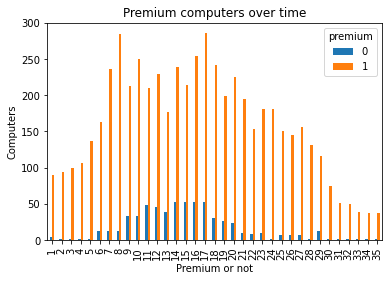

In [ ]:
pd.crosstab(df.trend,df.premium).plot(kind='bar')
plt.title('Premium computers over time')
plt.xlabel('Premium or not')
plt.ylabel('Computers')
plt.savefig('Premium vs non-premium')
df.premium.sum()
df.columns


In [ ]:
#What if Im curious knowing that some premium computers aren't considered 'premium'. So in order to do that Im going to train the data using linear SVC
# PRE-PROCESSING THE DATA preparing to train linearscv data now I believe that we didn't do linearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from tensorflow import keras


y = df.premium
X = df.drop(['premium'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=99)

# TRAIN LINEARSVC - 
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)


LinearSVC()
Score:  0.9056


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import confusion_matrix
ypred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm)

[[  66  485]
 [  12 5071]]


In [ ]:
#
print(5071+12)

5083


#Conclusion
In this research, we were able to find the that prices of a computer are tied to its hard drive and random access memory. When trying to figure out the factors of a computers speed, we discovered that its tied whether if it has a cd, more than one processors and is a premium computer. And we figured out that premium computers are better than normal computer with better speed, storage, and price. So if you want to get a computer, consider getting a premium computer. Or you are a computer engineer, consider what ram or hard drive to get for your computer.

#Sources
[Source1](https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html)

[Source2](https://www.kaggle.com/datasets/kingburrito666/basic-computer-data-set/code)